## El presente libro consta del analisis sobre la salud mentar en la industria técnologica 

### Importación de librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Se importa dataset

In [2]:
data = pd.read_csv("DatasetOSMI2014.csv")

### Revisión de la data 

In [3]:
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [6]:
data = data.loc[:,["Gender", "Age", "treatment", "remote_work","benefits","tech_company","wellness_program","mental_health_consequence", "phys_health_consequence"]]

In [7]:
data.head()

,Gender,Age,treatment,remote_work,benefits,tech_company,wellness_program,mental_health_consequence,phys_health_consequence
0,Female,37,Yes,No,Yes,Yes,No,No,No
1,M,44,No,No,Don't know,No,Don't know,Maybe,No
2,Male,32,No,No,No,Yes,No,No,No
3,Male,31,Yes,No,No,Yes,No,Yes,Yes
4,Male,31,No,Yes,Yes,Yes,Don't know,No,No


In [8]:
data = data.rename(columns={"Gender":"Genero", "Age":"Edad", "treatment":"Tratamiento", "remote_work":"TrabajoRemoto", "benefits":"Beneficios", "tech_company":"CompañiaTecnologica", "wellness_program":"ProgramaBienestar", "mental_health_consequence":"ProblemasSaludMental", "phys_health_consequence":"ProblemasSaludFisica"})

In [46]:
data.head()

,Genero,Edad,Tratamiento,TrabajoRemoto,Beneficios,CompañiaTecnologica,ProgramaBienestar,ProblemasSaludMental,ProblemasSaludFisica
0,Female,37,Yes,No,Yes,Yes,No,No,No
1,M,44,No,No,Don't know,No,Don't know,Maybe,No
2,Male,32,No,No,No,Yes,No,No,No
3,Male,31,Yes,No,No,Yes,No,Yes,Yes
4,Male,31,No,Yes,Yes,Yes,Don't know,No,No


In [9]:
data['Genero'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
data['Genero'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Masculino', inplace = True)

data['Genero'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Femenino', inplace = True)

data["Genero"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Otro', inplace = True)

In [11]:
data['Genero'].value_counts()

Genero
Masculino    991
Femenino     247
Otro          21
Name: count, dtype: int64

In [12]:
data.tail()

,Genero,Edad,Tratamiento,TrabajoRemoto,Beneficios,CompañiaTecnologica,ProgramaBienestar,ProblemasSaludMental,ProblemasSaludFisica
1254,Masculino,26,Yes,No,No,Yes,No,No,No
1255,Masculino,32,Yes,Yes,Yes,Yes,No,No,No
1256,Masculino,34,Yes,No,Yes,Yes,No,Yes,Yes
1257,Femenino,46,No,Yes,No,Yes,No,Yes,No
1258,Masculino,25,Yes,No,Yes,No,No,Maybe,No


In [13]:
data["Tratamiento"].value_counts()

Tratamiento
Yes    637
No     622
Name: count, dtype: int64

In [14]:
data.isnull().sum()

Genero                  0
Edad                    0
Tratamiento             0
TrabajoRemoto           0
Beneficios              0
CompañiaTecnologica     0
ProgramaBienestar       0
ProblemasSaludMental    0
ProblemasSaludFisica    0
dtype: int64

In [15]:
data["Tratamiento"].value_counts(normalize=True)

Tratamiento
Yes    0.505957
No     0.494043
Name: proportion, dtype: float64

In [17]:
media = np.mean(data["Tratamiento"].value_counts(normalize=True))
media

np.float64(0.5)

In [18]:
data["Genero"].value_counts()

Genero
Masculino    991
Femenino     247
Otro          21
Name: count, dtype: int64

In [20]:
data_eda = data.copy()

### Presentación gráfica de la data

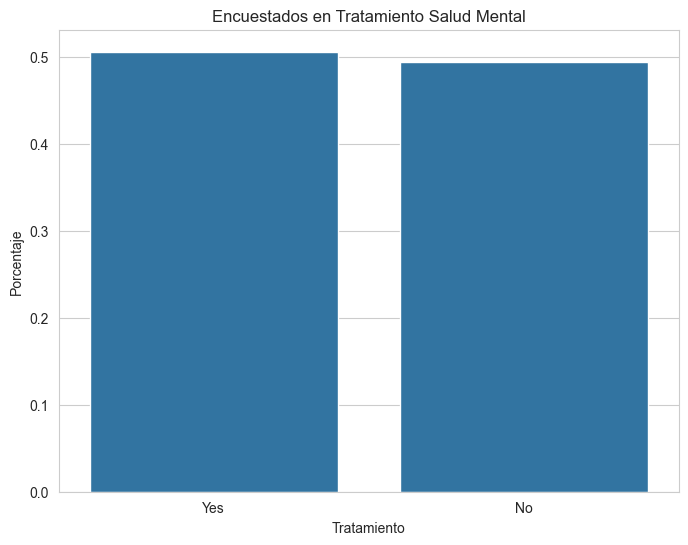

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_porcentaje = data_eda['Tratamiento'].value_counts(normalize = True).rename_axis('Tratamiento').reset_index(name = 'Porcentaje')
sns.barplot(x = 'Tratamiento', y = 'Porcentaje', data = eda_porcentaje.head(10))
plt.title('Encuestados en Tratamiento Salud Mental')
plt.show()

<Figure size 800x600 with 0 Axes>

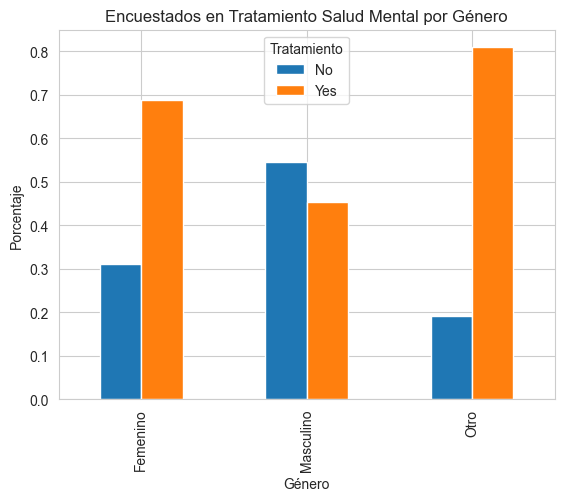

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_porcentaje = data_eda.groupby('Genero')['Tratamiento'].value_counts(normalize = True).unstack().plot(kind='bar')
plt.title('Encuestados en Tratamiento Salud Mental por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.show()

<Figure size 800x600 with 0 Axes>

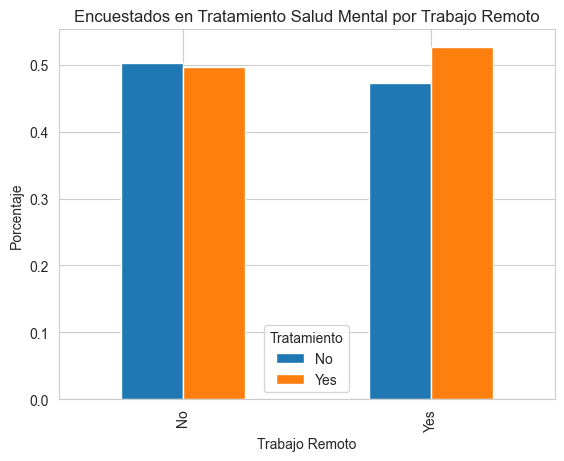

In [71]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_porcentaje = data_eda.groupby('TrabajoRemoto')['Tratamiento'].value_counts(normalize = True).unstack().plot(kind='bar')
plt.title('Encuestados en Tratamiento Salud Mental por Trabajo Remoto')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Porcentaje')
plt.show()

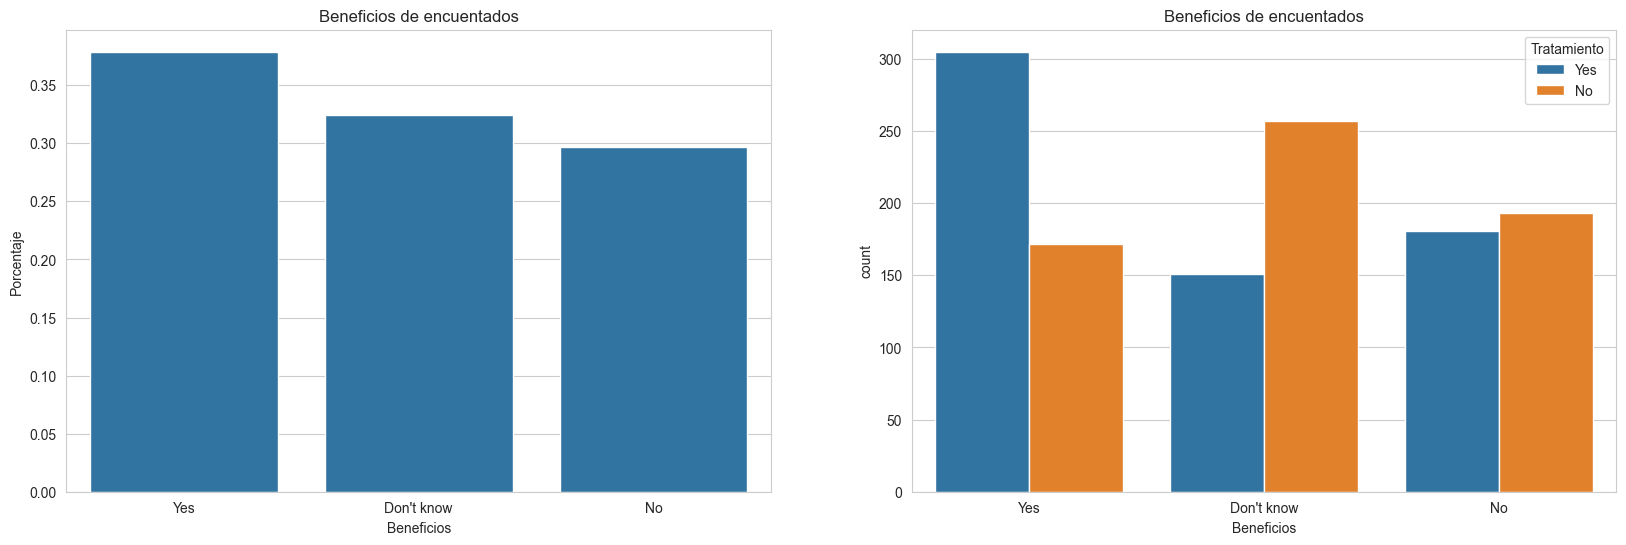

In [24]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_porcentaje = data_eda['Beneficios'].value_counts(normalize = True).rename_axis('Beneficios').reset_index(name = 'Porcentaje')
sns.barplot(x = 'Beneficios', y = 'Porcentaje', data = eda_porcentaje)
plt.title('Beneficios de encuentados')
plt.subplot(1,2,2)
sns.countplot(x = 'Beneficios', hue = 'Tratamiento', data = data_eda)
plt.title('Beneficios de encuentados')
plt.show()

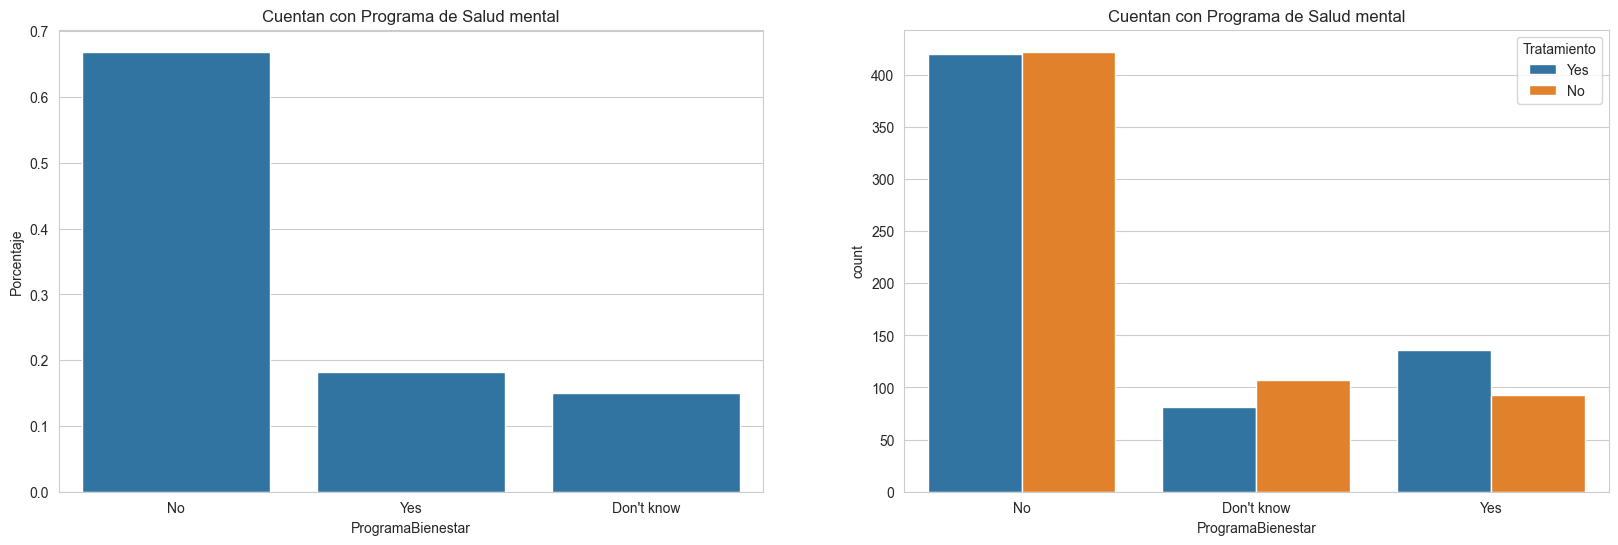

In [25]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_porcentaje = data_eda['ProgramaBienestar'].value_counts(normalize = True).rename_axis('ProgramaBienestar').reset_index(name = 'Porcentaje')
sns.barplot(x = 'ProgramaBienestar', y = 'Porcentaje', data = eda_porcentaje)
plt.title('Cuentan con Programa de Salud mental')
plt.subplot(1,2,2)
sns.countplot(x = 'ProgramaBienestar', hue = 'Tratamiento', data = data_eda)
plt.title('Cuentan con Programa de Salud mental')
plt.show()

In [30]:
data["CompañiaTecnologica"].value_counts()

CompañiaTecnologica
Yes    1031
No      228
Name: count, dtype: int64

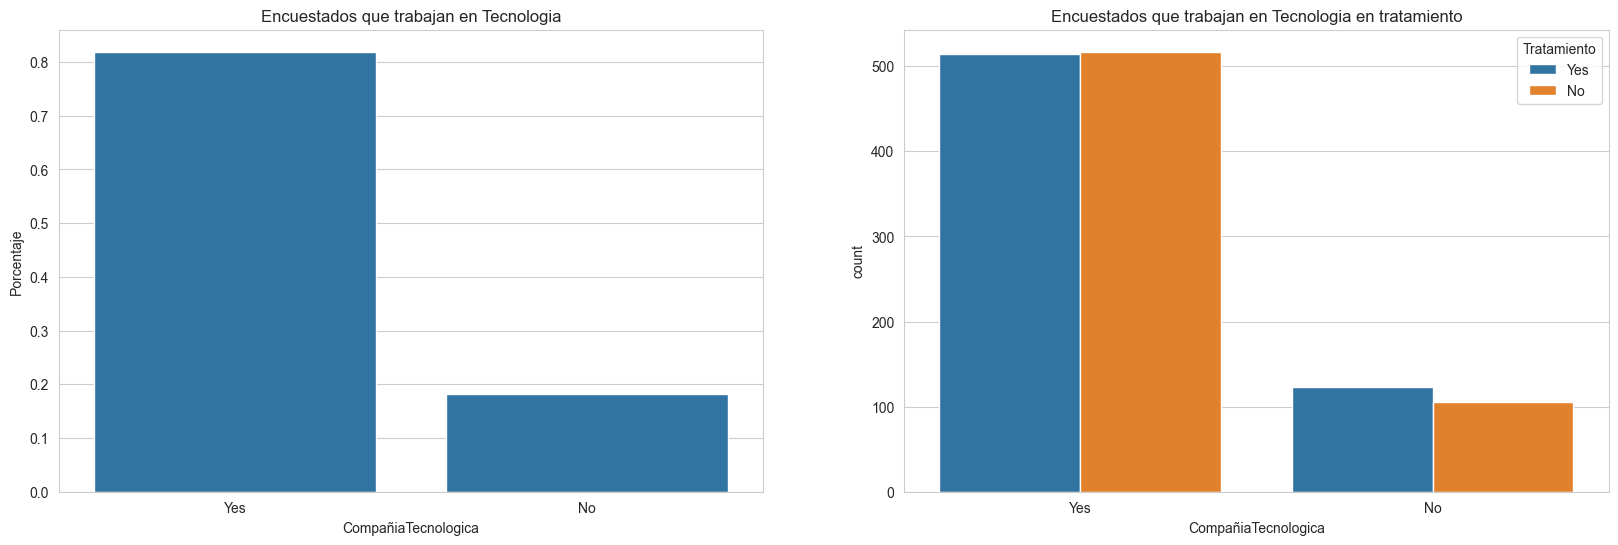

In [31]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_porcentaje = data_eda['CompañiaTecnologica'].value_counts(normalize = True).rename_axis('CompañiaTecnologica').reset_index(name = 'Porcentaje')
sns.barplot(x = 'CompañiaTecnologica', y = 'Porcentaje', data = eda_porcentaje)
plt.title('Encuestados que trabajan en Tecnologia')
plt.subplot(1,2,2)
sns.countplot(x = 'CompañiaTecnologica', hue = 'Tratamiento', data = data_eda)
plt.title('Encuestados que trabajan en Tecnologia en tratamiento')
plt.show()

# Resumen de Resultados

## El anterior analisis de datos sobre salud mental nos lleva a las siguientes conclusiones:

 - La mitad de los empleados encuestados están recibiendo tratamiento psicológico.
 - En cuanto a género, se observa que la mayoría de las personas que definieron su género diferente a masculino o femenino están en tratamiento y el género masculino cuenta con la menor cantidad de personas en tratamiento.
 - Relacionado al trabajo remoto no se observa una gran diferencia de las personas que hacen trabajo remoto y están en tratamiento con las que asisten a su sitio de trabajo.
 - Los encuestados que están sabedores de que poseen beneficios referente a salud mental están en tratamiento, lo que indica que poseer ese tipo de beneficios fomenta el interés por la salud mental en los trabajadores.
 - Aunque la mayoría de las personas encuestadas no poseen un programa de salud mental, la mitad de esas personas se encuentran en tratamiento.
 - La mitad de las personas que trabajan en una empresa de técnologia se encuentran en tratamiento 